# Content
* [Project Description]
* [Step 1 Import Module]
* [Step 2 Import Datasets]
* [Step 3 Checking Datasets]
* [Step 4 Fixing Datasets]
    * [Step 4.1 Fixing Name Column]
    * [Step 4.2 Filling The Missing Values]
* [Step 5 Model Development]
    * [Step 5.1 Label Encoding]
    * [Step 5.2 Determining the Target and Features]
    * [Step 5.3 Splitting Data into 3 Parts]
    * [Step 5.4 Features Scalling]
* [Step 6 Training The Model]
    * [Step 6.1 Random Forest]
    * [Step 6.2 Decision Tree]
    * [Step 6.3 Logistic Regression]
* [Step 7 Class Checking]
    * [Step 7.1 Sanity Check]
    * [Step 7.2 Menghitung Hasil Prediksi Kelas]
* [Step 8 Checking The Imbalanced Class]
    * [Step 8.1 Confusion Matrix]
    * [Step 8.2 Recall]
    * [Step 8.3 Precision]
    * [Step 8.4 F1 Score]
* [Step 9 Improving Model Quality]
    * [Step 9.1 Upsampling]
    * [Step 9.2 Class Weight Adjustment]
* [Step 10 ROC Curve and AUC-ROC Value]
    * [Step 10.1 Random Forest]
    * [Step 10.2 Decision Tree]
    * [Step 10.3 Logistic Regression]
* [Step 11 Conclusion]

# Project Description
In this project, we are tasked with predicting whether customers will soon leave the bank or not based on historical data. Our task is to create a model that achieves a minimum F1 score of 0.59 when tested with the test data.

# Import Module

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

# Import Datasets

In [11]:
try:
    data = pd.read_csv('D:\datasets\Churn.csv')
except:
    data = pd.read_csv('datasets/Churn.csv')

# Checking Datasets

In [12]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [14]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Information obtained:
- The data consists of 13 columns and 10,000 rows.
- The `Tenure` column has 909 rows with missing values.
- Inappropriate data type is found in the `Tenure` column because the data in it represents years, so the appropriate data type is `int64`.

# Fixing Datasets

## Fixing Column Name

In [15]:
data.columns = data.columns.str.lower()

In [16]:
data

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [17]:
data = data.rename(columns={'rownumber':'row_number',
                                   'customerid':'customer_id',
                                    'creditscore':'credit_score',
                                    'numofproducts':'num_of_products',
                                    'hascrcard':'has_cr_card',
                                    'isactivemember':'is_active_member',
                                    'estimatedsalary':'estimated_salary'
                                   })

In [18]:
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Filling The Missing Value

In [19]:
data['tenure'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [20]:
data['tenure'] = data['tenure'].fillna(0)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Missing values are filled with the value 0. This is done because during data entry, it's possible that when 0 is not needed to be explicitly stated, the result is represented as **NaN** (Not-a-Number).

# Model Development

### Label Encoding

In [22]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
new_data = data.drop('surname', axis=1)

In [24]:
encoder = OrdinalEncoder()

In [25]:
data_ordinal = pd.DataFrame(encoder.fit_transform(new_data), columns=new_data.columns)

In [26]:
data_ordinal.head()

,row_number,customer_id,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,0.0,2736.0,228.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0,1.0
1,1.0,3258.0,217.0,2.0,0.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0,0.0
2,2.0,2104.0,111.0,0.0,0.0,24.0,8.0,5793.0,2.0,1.0,0.0,5707.0,1.0
3,3.0,5435.0,308.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0,0.0
4,4.0,6899.0,459.0,2.0,0.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0,0.0


From the information provided, we can conclude the following:

- Before training the model, it's better to convert string features or columns into numerical values.
- The `surname` column is discarded because it is unlikely to significantly impact the model's performance even if encoding is applied.
- Ordinal encoding is performed because it is more suitable for models that use a tree-based system like Decision Trees and Random Forests.

## Determining the Target and Features

In [27]:
target = data_ordinal['exited']

In [28]:
target.shape

(10000,)

In [29]:
features = data_ordinal.drop(['row_number', 'exited'], axis=1)

In [30]:
features.shape

(10000, 11)

## Splitting Data into 3 Parts

In [31]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

In [32]:
features_train.shape

(7500, 11)

In [33]:
features_valid.shape

(2500, 11)

In [34]:
target_train.shape

(7500,)

In [35]:
target_valid.shape

(2500,)

## Features Scalling

In [36]:
features_train.head()

,customer_id,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
226,8349.0,303.0,0.0,0.0,12.0,9.0,0.0,1.0,1.0,1.0,1322.0
7756,1600.0,230.0,2.0,0.0,18.0,7.0,2900.0,0.0,1.0,1.0,7790.0
2065,616.0,235.0,0.0,1.0,15.0,8.0,0.0,1.0,1.0,0.0,6954.0
2800,3240.0,378.0,0.0,1.0,33.0,9.0,5709.0,1.0,1.0,0.0,1965.0
7028,2078.0,327.0,1.0,1.0,8.0,0.0,5283.0,0.0,0.0,0.0,2501.0


In [37]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(features_train[numeric])

StandardScaler()

In [40]:
features_train[numeric] = scaler.transform(features_train[numeric])

In [41]:
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [42]:
features_train.head()

,customer_id,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
226,8349.0,0.442946,0.0,0.0,-0.841540,1.426885,-0.954573,1.0,1.0,1.0,-1.271910
7756,1600.0,-0.311975,2.0,0.0,-0.270755,0.784858,0.409643,0.0,1.0,1.0,0.959687
2065,616.0,-0.260268,0.0,1.0,-0.556148,1.105871,-0.954573,1.0,1.0,0.0,0.671249
2800,3240.0,1.218550,0.0,1.0,1.156208,1.426885,1.731050,1.0,1.0,0.0,-1.050061
7028,2078.0,0.691140,1.0,1.0,-1.222064,-1.462240,1.530652,0.0,0.0,0.0,-0.865130


# Training The Model

## Random Forest

In [43]:
model_rfc = RandomForestClassifier(random_state=12345, max_depth=8, n_estimators=50)

In [44]:
model_rfc.fit(features_train, target_train)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=12345)

In [45]:
predict_valid_rfc = model_rfc.predict(features_valid)

In [46]:
accuracy_score(target_valid, predict_valid_rfc)

0.8516

## Decision Tree

In [47]:
model_dst = DecisionTreeClassifier(random_state=12345, max_depth=8)

In [48]:
model_dst.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=8, random_state=12345)

In [49]:
predict_valid_dst = model_dst.predict(features_valid)

In [50]:
accuracy_score(target_valid, predict_valid_dst)

0.8476

## Logistic Regression

In [51]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')

In [52]:
model_lr.fit(features_valid, target_valid)

LogisticRegression(random_state=12345, solver='liblinear')

In [53]:
predict_valid_lr = model_lr.predict(features_valid)

In [54]:
accuracy_score(target_valid, predict_valid_lr)

0.7844

**Conclusion:**
- The model with the highest accuracy rate is Random Forest with an accuracy rate of **85%**.
- The second-highest accuracy rate is achieved by Logistic Regression with an accuracy rate of **79%**.
- Lastly, Decision Tree has an accuracy rate of **84%**.
- Based on the information provided, all three models have relatively good accuracy rates. However, accuracy alone does not determine whether a model performs well or not. Further evaluation and checks will be conducted on this matter.

# Class Checking

## Sanity Check

In [55]:
# Calculating Class Frequencies
class_frequency = data_ordinal['exited'].value_counts(normalize=True)

In [56]:
class_frequency

0.0    0.7963
1.0    0.2037
Name: exited, dtype: float64

<AxesSubplot:>

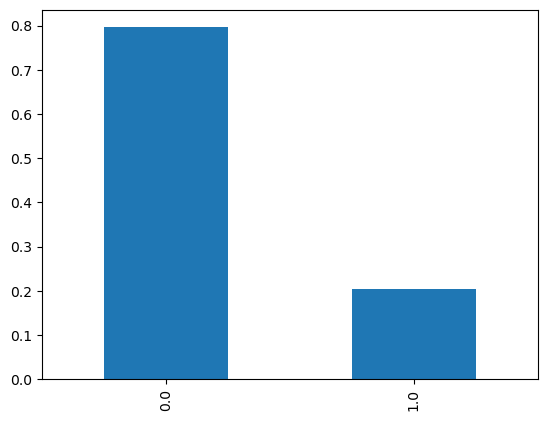

In [57]:
# Plot the class frequency results
class_frequency.plot(kind='bar')

#### Random Forest

In [58]:
# Creating the prediction results as a series
predicted_valid_rfc = pd.Series(model_rfc.predict(features_valid))

In [59]:
# Calculating the class frequencies of the Random Forest model's prediction results
class_frequency1 = predicted_valid_rfc.value_counts(normalize=True)

In [60]:
class_frequency1

0.0    0.9
1.0    0.1
dtype: float64

#### Decision Tree

In [61]:
# Creating the prediction results as a series
predicted_valid_dst = pd.Series(model_dst.predict(features_valid))

In [62]:
# Calculating the class frequencies of the Decision Tree model's prediction results
class_frequency2 = predicted_valid_dst.value_counts(normalize=True)

In [63]:
class_frequency2

0.0    0.8864
1.0    0.1136
dtype: float64

#### Logistic Regression

In [64]:
# Creating the prediction results as a series
predicted_valid_lr = pd.Series(model_lr.predict(features_valid))

In [65]:
# Calculating the class frequencies of the Logistic Regression model's prediction results
class_frequency3 = predicted_valid_lr.value_counts(normalize=True)

In [66]:
class_frequency3

0.0    0.9472
1.0    0.0528
dtype: float64

## Calculating Constant Prediction Results

In [67]:
target_pred_constant = pd.Series(0, index=target_valid.index)

In [68]:
accuracy_score(target_valid, target_pred_constant)

0.786

**Conclusion:**
A Sanity Check is performed to verify if the model you've created has an accuracy that is close to a certain benchmark or baseline. From the experiment using the above models, some conclusions that can be drawn include:

**Random Forest:**
In this model, an accuracy of **0.9** is achieved for class 0, which means the current model struggles to predict class 1 effectively. There is a need for class weight adjustment in this model. Considering the model has an overall accuracy of **85%**, the difference in the model's predictions for class 0 is only **5%**.

**Decision Tree:**
In this model, an accuracy rate of **79%** is achieved for class 0. This accuracy rate is not significantly different from the model's overall accuracy of **77%**. The appearance of class 0 in the model's predictions is also **77%**. It's possible that this model is experiencing underfitting.

**Logistic Regression:**
In this model, an accuracy rate of **93%** is achieved for class 0. This accuracy is higher than the model's overall accuracy of **79%**. This suggests that the model is only good at predicting class 0. The model's overall accuracy is not significantly different from the constant prediction accuracy of **78%**, with only a **1%** difference, indicating that the current model's performance is poor.

# Checking The Imbalanced Class

## Confusion Matrix

#### Random Forest

In [69]:
confusion_matrix(target_valid, predict_valid_rfc)

array([[1922,   43],
       [ 328,  207]], dtype=int64)

#### Decision Tree

In [70]:
confusion_matrix(target_valid, predict_valid_dst)

array([[1900,   65],
       [ 316,  219]], dtype=int64)

#### Logistic Regression

In [71]:
confusion_matrix(target_valid, predict_valid_lr)

array([[1897,   68],
       [ 471,   64]], dtype=int64)

## Recall

#### Random Forest

In [72]:
recall_score(target_valid, predict_valid_rfc)

0.38691588785046727

#### Decision Tree

In [73]:
recall_score(target_valid, predict_valid_dst)

0.4093457943925234

#### Logistic Regression

In [74]:
recall_score(target_valid, predict_valid_lr)

0.11962616822429907

## Precision

#### Random Forest

In [75]:
precision_score(target_valid, predict_valid_rfc)

0.828

#### Decision Tree

In [76]:
precision_score(target_valid, predict_valid_dst)

0.7711267605633803

#### Logistic Regression

In [77]:
precision_score(target_valid, predict_valid_lr)

0.48484848484848486

## F1 Score

#### Random Forest

In [78]:
f1_score(target_valid, predict_valid_rfc)

0.527388535031847

#### Decision Tree

In [79]:
f1_score(target_valid, predict_valid_dst)

0.5347985347985348

#### Logistic Regression

In [80]:
f1_score(target_valid, predict_valid_lr)

0.19190404797601202

From the information above, it can be concluded that:

**Random Forest:**
- The Confusion Matrix values indicate that the most frequently occurring value is True Negative. This means that the model being developed more often predicts negative values.
- The obtained Recall value is close to 0. This implies that our model is not good at identifying True Positives. The model needs improvement.
- In contrast to the Recall value, the Precision value obtained is close to one. This indicates that our model is good at identifying negative answers when searching for positive answers.
- The F1 Score obtained using validation data is **0.52**, which is lower than the defined threshold.

**Decision Tree:**
- The Confusion Matrix values indicate that the most frequently occurring value is True Negative. This suggests that the trained model more often predicts negative values.
- The obtained recall value is 0.5, which is far from 1. The precision value is also far from one, with a value of 0.77.
- The F1 Score obtained is 0.43.

**Logistic Regression:**
- The Confusion Matrix values indicate that the most frequently occurring value is True Negative. This suggests that the trained model more often predicts negative values.
- The obtained recall value is 0.18, and the precision value is 0.59. Both values are far from 1.
- The F1 Score obtained is around 0.28, which is significantly below the defined threshold.

**Conclusion:**
The models' performance falls far short of the desired level, with very low precision, recall, and F1-scores. Given the high imbalance in precision and recall, these models will need significant improvements.

# Improving Model Quality

## Upsampling

In [81]:
# Creating an upsampling model
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

### Random Forest

In [82]:
features_sampled, target_sampled = upsample(features_train, target_train, 5)

In [83]:
model_rfc.fit(features_sampled, target_sampled)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=12345)

In [84]:
# Testing the model using validation datasets
new_predict_valid_rfc1 = model_rfc.predict(features_valid)

In [85]:
f1_score(target_valid, new_predict_valid_rfc1)

0.5957446808510637

### Decision Tree

In [86]:
model_dst.fit(features_sampled, target_sampled)

DecisionTreeClassifier(max_depth=8, random_state=12345)

In [87]:
new_predict_valid_dst1 = model_dst.predict(features_valid)

In [88]:
f1_score(target_valid, new_predict_valid_dst1)

0.5739385065885798

### Logistic Regression

In [89]:
model_lr.fit(features_sampled, target_sampled)

LogisticRegression(random_state=12345, solver='liblinear')

In [90]:
new_predict_valid_lr1 = model_lr.predict(features_valid)

In [91]:
f1_score(target_valid, new_predict_valid_lr1)

0.49434187016081005

## Class Weight Adjustment

### Random Forest

In [92]:
# Increasing the weight on classes
new_model_rfc = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=50, class_weight='balanced')

In [93]:
new_model_rfc.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       random_state=12345)

In [94]:
# Testing the model using validation datasets
new_predict_valid_rfc = new_model_rfc.predict(features_valid)

In [95]:
f1_score(target_valid, new_predict_valid_rfc)

0.6073102155576383

### Decision Tree

In [96]:
new_model_dst = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')

In [97]:
new_model_dst.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345)

In [98]:
new_predict_valid_dst = new_model_dst.predict(features_valid)

In [99]:
f1_score(target_valid, new_predict_valid_dst)

0.5841584158415841

### Logistic Regression

In [100]:
new_model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

In [101]:
new_model_lr.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [102]:
new_predict_valid_lr = new_model_lr.predict(features_valid)

In [103]:
f1_score(target_valid, new_predict_valid_lr)

0.49136786188579024

**Conclusion:**

- Based on the information above, it can be seen that the model has improved. Here, we have added the upsample method and class weight adjustment method. Upsampling is chosen to help the model better recognize positive values since the confusion matrix results indicate that the model is more familiar with negative class than the positive class.
- Class weight adjustment is performed to give more weight to the rarely occurring class compared to the frequently occurring class.

The results of the two methods are as follows:

- Random Forest is able to reach the predefined threshold. Using upsampling, the model achieves an F1 Score of **59%**, and with class weight adjustment, it reaches an F1 Score of **60%**.

- Decision Tree cannot reach the predefined threshold. Despite the difference being only 1-2%, it's still not sufficient. For the upsampling method, this model obtains an F1 Score of **57%**, and for class weight adjustment, it achieves an F1 Score of **58%**.

- Logistic Regression is unable to reach the predefined threshold. Even though two different methods were used, the F1 Score obtained is quite far from the target. For the upsampling method, the F1 Score obtained is **47%**, and with class weight adjustment, it reaches an F1 Score of **49%**.

## ROC Curve and AUC-ROC Value

## Random Forest

In [104]:
# Threshold Adjustment
probabilities_valid_rfc = new_model_rfc.predict_proba(features_valid)

In [105]:
probabilities_one_valid_rfc = probabilities_valid_rfc[:, 1]

In [106]:
probabilities_one_valid_rfc[:10]

array([0.49656804, 0.25800135, 0.08638598, 0.38647168, 0.03858509,
       0.06359534, 0.07449224, 0.26810747, 0.11806798, 0.88512467])

In [107]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(target_valid, probabilities_one_valid_rfc)

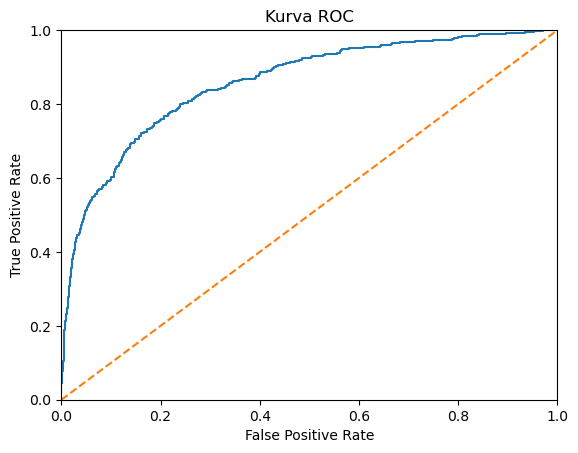

In [108]:
# Creating the ROC Curve
plt.figure()
plt.plot(fpr_rfc, tpr_rfc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

In [109]:
# AUC-ROC Score
auc_roc_rfc = roc_auc_score(target_valid, probabilities_one_valid_rfc)

In [110]:
auc_roc_rfc

0.8570459679912487

## Decision Tree

In [111]:
probabilities_valid_dst = new_model_dst.predict_proba(features_valid)

In [112]:
probabilities_one_valid_dst = probabilities_valid_dst[:, 1]

In [113]:
fpr_dst, tpr_dst, thresholds_dst = roc_curve(target_valid, probabilities_one_valid_dst)

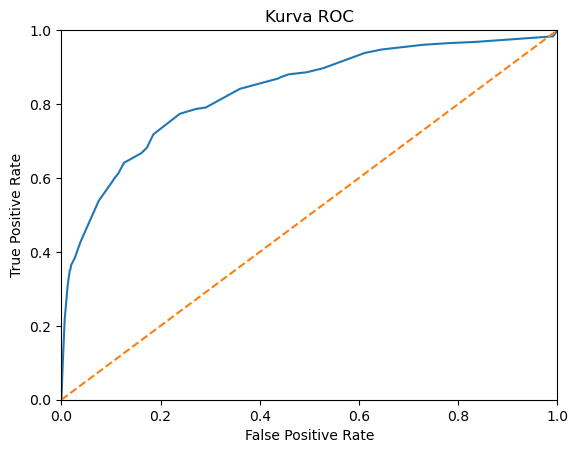

In [114]:
plt.figure()
plt.plot(fpr_dst, tpr_dst)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

In [115]:
auc_roc_dst = roc_auc_score(target_valid, probabilities_one_valid_dst)

In [116]:
auc_roc_dst

0.8343701695560153

## Logistic Regression

In [117]:
probabilities_valid_lr = new_model_lr.predict_proba(features_valid)

In [118]:
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

In [119]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(target_valid, probabilities_one_valid_lr)

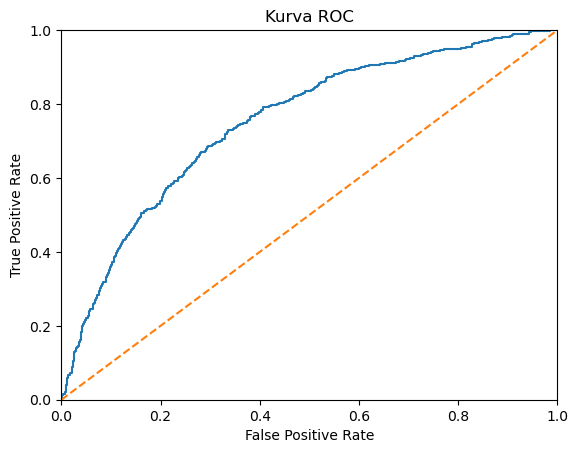

In [120]:
plt.figure()
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

In [121]:
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)

In [122]:
auc_roc_lr

0.7509395733751872

**Conclusion:**
- Based on the created curves, the model with the best performance is the Random Forest Classifier.
- The model with the lowest performance is Logistic Regression.
- The AUC-ROC values for the models are as follows: Random Forest is **85%**, Decision Tree is **83%**, and Logistic Regression is **75%**.
- Overall, it can be observed that the Decision Tree model performs the best.

# Conclusion

Before creating the model, we need to perform preprocessing first:

- Renaming columns.
- Handling missing values in the `tenure` column.

Model Development:
- Since the features are in string format, encoding techniques need to be applied.
- Next is to split the data into features and target. Because our target is identifying customers who have exited, our target column is `exited`.
- After the features are transformed, the next step is feature scaling to standardize the features.

Model Training:
Random Forest:
- Had an accuracy rate of 85% before adjusting its weights.
- The F1 Score value before weight adjustment was 52%. After weight adjustment, it increased to 59% using upsampling and 60% using class weight adjustment.
- The AUC-ROC value is 85%, which, although not perfect, is a decent result for prediction.

Decision Tree:
- Achieved an accuracy rate of 84%.
- The obtained F1 Score is 53%, which is still far from the predefined threshold. After using upsampling, the F1 Score increased to 57%, and it reached 58% after using class weight adjustment.
- The AUC-ROC value is 84%, which is only 1% different from Random Forest. This indicates that this model can still be used.

Logistic Regression:
- Achieved an accuracy rate of 78%.
- The obtained F1 Score is 19%, which is very low.
- The AUC-ROC value obtained is 75%. Compared to the values of the other models, it seems like this model may not be suitable for the task.

**Conclusion:** Based on the above discussion, the Random Forest model performs the best in predicting whether customers will exit or not. This model produces a significant number of True Negatives (0), indicating that many customers are likely to stay. This is influenced by the number of products used and the activity level of the customers at the bank.